# Condition Classification Model
## Rebecca Lewis
### DSC 680

In [1]:
from pycaret.classification import *
import pandas as pd
import numpy as np

In [2]:
#load final data
dataset = pd.read_csv('../Data/modeling_dataset.csv')
dataset.head()

,request_type,species,size,call_to_dispatch_sec,lat,long,condition,temperament,incident_month,incident_weekday,incident_hour,Cluster
0,CRUELTY CASE,DOG,LARGE,2160.0,30.494640,-91.156160,FAIR,FRIENDLY,12,1,15,Cluster 1
1,TRAPPED ANIMAL,OTHER,LARGE,60.0,30.431417,-91.141070,FAIR,NORMAL,12,2,10,Cluster 1
2,STRAY,DOG,LARGE,0.0,30.648540,-91.156770,EMACIATED,FRIENDLY,12,2,9,Cluster 4
3,STRAY,DOG,SMALL,2400.0,30.429104,-91.185036,EMACIATED,NORMAL,12,2,15,Cluster 1
4,OWNER SIGNED RELEASE,DOG,EXTRA LARGE,420.0,30.529593,-91.125534,GOOD,FRIENDLY,12,2,10,Cluster 1


In [3]:
clf_model = setup(dataset, target='condition', ignore_features=['temperament', 'lat', 'long'], fix_imbalance=True)

,Description,Value
0,session_id,7200
1,Target,condition
2,Target Type,Multiclass
3,Label Encoded,"EMACIATED: 0, EXCELLENT: 1, FAIR: 2, GOOD: 3, POOR: 4, UNKNOWN: 5"
4,Original Data,"(38288, 12)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6661,0.6699,0.3124,0.6278,0.5978,0.1826,0.2272,1.6470
rf,Random Forest Classifier,0.6608,0.7065,0.3526,0.6242,0.6267,0.2534,0.2688,3.5940
et,Extra Trees Classifier,0.6385,0.6989,0.3685,0.6093,0.6178,0.2507,0.2561,4.8680
gbc,Gradient Boosting Classifier,0.6158,0.6372,0.3428,0.5668,0.5668,0.1405,0.1539,35.2010
dt,Decision Tree Classifier,0.5809,0.6154,0.3703,0.5890,0.5847,0.2287,0.2289,0.5230
ada,Ada Boost Classifier,0.3577,0.5410,0.3559,0.5153,0.3943,0.0822,0.0916,1.5010
knn,K Neighbors Classifier,0.3489,0.6234,0.3475,0.5724,0.3807,0.1301,0.1529,1.1730
lda,Linear Discriminant Analysis,0.2815,0.6068,0.4565,0.5510,0.3083,0.1069,0.1315,0.8770
lr,Logistic Regression,0.2373,0.5951,0.4383,0.5458,0.2588,0.0866,0.1098,6.9610
ridge,Ridge Classifier,0.2191,0.0000,0.4562,0.5565,0.2248,0.0921,0.1209,0.1740


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7200, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Condition: Building the Model

In [5]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6639,0.6981,0.3241,0.6262,0.6254,0.2470,0.2661
1,0.6578,0.7190,0.3171,0.6203,0.6222,0.2415,0.2575
2,0.6649,0.7010,0.3985,0.6295,0.6306,0.2619,0.2784
3,0.6627,0.6996,0.3562,0.6254,0.6300,0.2622,0.2766
4,0.6552,0.7099,0.3892,0.6177,0.6235,0.2511,0.2638
5,0.6672,0.7045,0.3448,0.6347,0.6337,0.2637,0.2807
6,0.6631,0.7133,0.3054,0.6277,0.6297,0.2584,0.2737
7,0.6481,0.6977,0.3358,0.6062,0.6127,0.2263,0.2399
8,0.6578,0.7007,0.3801,0.6224,0.6239,0.2456,0.2609
9,0.6672,0.7209,0.3749,0.6323,0.6354,0.2765,0.2911


In [6]:
tuned_rf_model = tune_model(rf_model, optimize='F1', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5032,0.6007,0.4070,0.5526,0.5187,0.1333,0.1364
1,0.4802,0.5979,0.3743,0.5379,0.4973,0.1056,0.1087
2,0.5060,0.6054,0.4304,0.5484,0.5144,0.1211,0.1242
3,0.4705,0.5904,0.3987,0.5378,0.4943,0.1095,0.1127
4,0.4993,0.5943,0.4665,0.5504,0.5121,0.1287,0.1320
5,0.4922,0.6105,0.4210,0.5543,0.5132,0.1306,0.1339
6,0.4963,0.5947,0.3719,0.5438,0.5136,0.1187,0.1207
7,0.4899,0.6004,0.4200,0.5414,0.5054,0.1189,0.1217
8,0.5086,0.5965,0.4264,0.5368,0.5138,0.1111,0.1131
9,0.4854,0.5941,0.4215,0.5408,0.5032,0.1122,0.1150


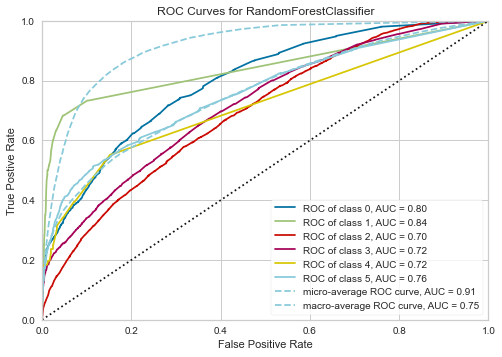

In [7]:
plot_model(tuned_rf_model, plot = 'auc')

In [ ]:
#EMACIATED: 0, EXCELLENT: 1, FAIR: 2, GOOD: 3, POOR: 4, UNKNOWN: 5

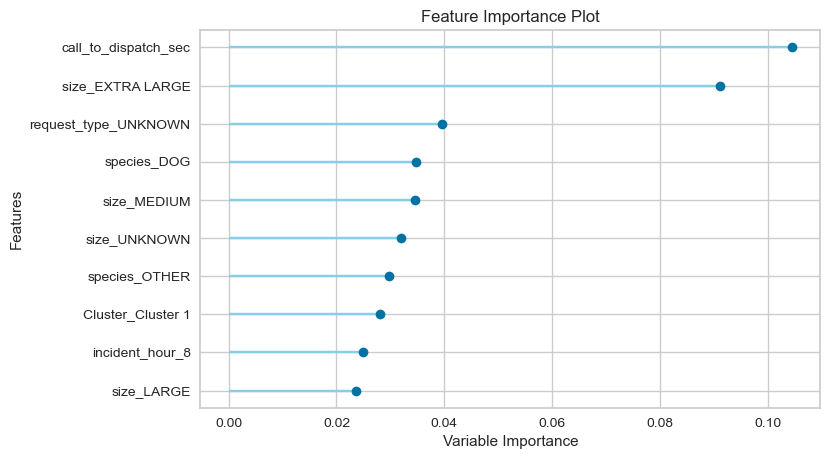

In [8]:
plot_model(tuned_rf_model, plot='feature')

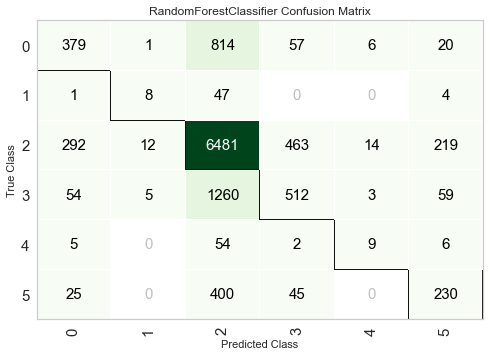

In [9]:
plot_model(tuned_rf_model, plot = 'confusion_matrix')

In [10]:
evaluate_model(tuned_rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Condition: Running the model on test data

In [11]:
predict_model(tuned_rf_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6633,0.7154,0.3357,0.6295,0.6334,0.2694,0.2823


In [12]:
final_rf_model = finalize_model(tuned_rf_model)

In [13]:
save_model(final_rf_model,'Final_Condition_RF_Model_04072021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['temperament', 'lat',
                                                        'long'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='condition',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_